# Circuit VS_R2L3

In [1]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *
from dataprocessing.timeseries import *

## DPsim EMT

In [3]:
# read EMT results
work_dir = '../../../Logs/'
log_name = 'EMT_VS_R2L3'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = read_timeseries_dpsim(work_dir + log_name + '.csv')

../../../Logs/EMT_VS_R2L3.csv
DPsim results real column names: ['i12', 'i34', 'v1', 'v2', 'v3', 'v4']
DPsim results complex column names: []
DPsim results variable number: 6
DPsim results length: 10001


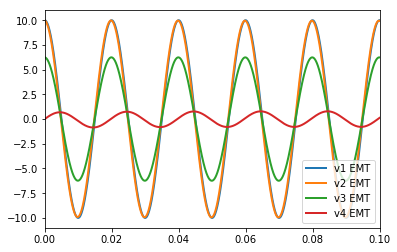

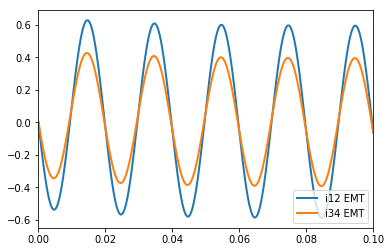

In [4]:
set_timeseries_labels(ts_dpsim_emt['v1'], 'v1 EMT')
set_timeseries_labels(ts_dpsim_emt['v2'], 'v2 EMT')
set_timeseries_labels(ts_dpsim_emt['v3'], 'v3 EMT')
set_timeseries_labels(ts_dpsim_emt['v4'], 'v4 EMT')
set_timeseries_labels(ts_dpsim_emt['i12'], 'i12 EMT')
set_timeseries_labels(ts_dpsim_emt['i34'], 'i34 EMT')
plot_timeseries(1, ts_dpsim_emt['v1'])
plot_timeseries(1, ts_dpsim_emt['v2'])
plot_timeseries(1, ts_dpsim_emt['v3'])
plot_timeseries(1, ts_dpsim_emt['v4'])
plot_timeseries(2, ts_dpsim_emt['i12'])
plot_timeseries(2, ts_dpsim_emt['i34'])

## DPsim DP

In [5]:
# read DP results
work_dir = '../../../Logs/'
log_name = 'DP_VS_R2L3'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = read_timeseries_dpsim(work_dir + log_name + '.csv')

../../../Logs/DP_VS_R2L3.csv
DPsim results real column names: []
DPsim results complex column names: ['i12', 'i34', 'v1', 'v2', 'v3', 'v4']
DPsim results variable number: 6
DPsim results length: 1000


In [6]:
#convert to emt
ts_dpsim_dp_emt = get_node_emt_voltages(ts_dpsim_dp, 50)

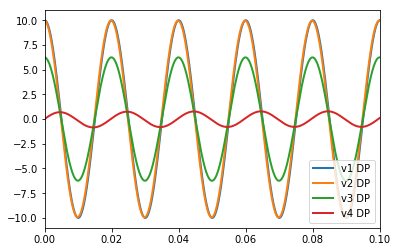

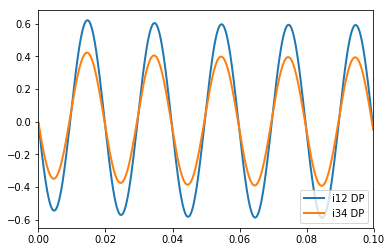

In [7]:
set_timeseries_labels(ts_dpsim_dp_emt['v1'], 'v1 DP')
set_timeseries_labels(ts_dpsim_dp_emt['v2'], 'v2 DP')
set_timeseries_labels(ts_dpsim_dp_emt['v3'], 'v3 DP')
set_timeseries_labels(ts_dpsim_dp_emt['v4'], 'v4 DP')
set_timeseries_labels(ts_dpsim_dp_emt['i12'], 'i12 DP')
set_timeseries_labels(ts_dpsim_dp_emt['i34'], 'i34 DP')
plot_timeseries(1, ts_dpsim_dp_emt['v1'])
plot_timeseries(1, ts_dpsim_dp_emt['v2'])
plot_timeseries(1, ts_dpsim_dp_emt['v3'])
plot_timeseries(1, ts_dpsim_dp_emt['v4'])
plot_timeseries(2, ts_dpsim_dp_emt['i12'])
plot_timeseries(2, ts_dpsim_dp_emt['i34'])

## Simulink reference results

In [62]:
# read Simulink log file
work_dir = '../../results/Simulink/Circuits/'
log_name = 'SL_VS_R2L3'
print(work_dir + log_name + '.csv')

ts_sl = read_timeseries_simulink(work_dir + log_name + '.csv')

../../results/Simulink/Circuits/SL_VS_R2L3.csv
Simulink results real column names: ['v1', 'v2', 'v3', 'v4', 'i12', 'i34']
Simulink results complex column names: []
Simulink results variable number: 6
Simulink results length: 1001


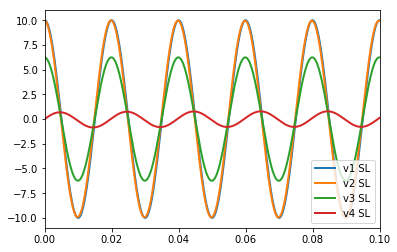

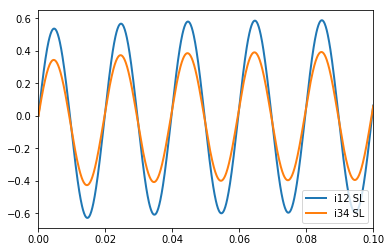

In [69]:
set_timeseries_labels(ts_sl['v1'], 'v1 SL')
set_timeseries_labels(ts_sl['v2'], 'v2 SL')
set_timeseries_labels(ts_sl['v3'], 'v3 SL')
set_timeseries_labels(ts_sl['v4'], 'v4 SL')
set_timeseries_labels(ts_sl['i12'], 'i12 SL')
set_timeseries_labels(ts_sl['i34'], 'i34 SL')
plot_timeseries(1, ts_sl['v1'])
plot_timeseries(1, ts_sl['v2'])
plot_timeseries(1, ts_sl['v3'])
plot_timeseries(1, ts_sl['v4'])
plot_timeseries(2, ts_sl['i12'])
plot_timeseries(2, ts_sl['i34'])

## Comparison

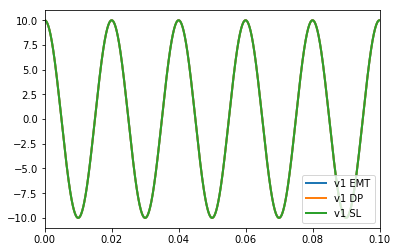

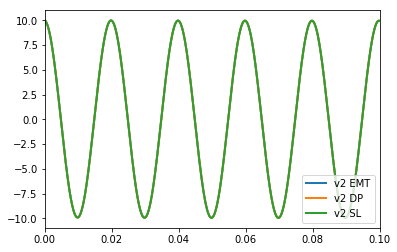

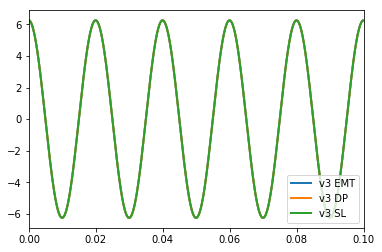

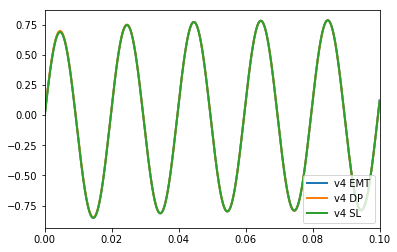

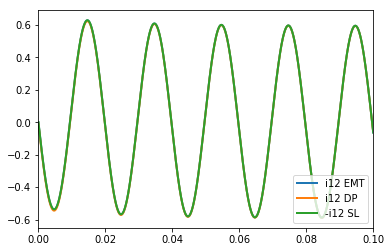

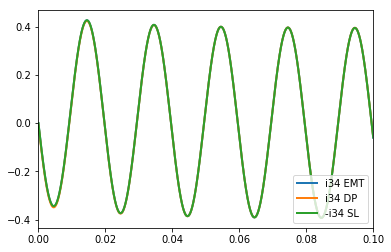

In [70]:
# plot v1
plot_timeseries(1, ts_dpsim_emt['v1'])
plot_timeseries(1, ts_dpsim_dp_emt['v1'])
plot_timeseries(1, ts_sl['v1'])
# plot v2
plot_timeseries(2, ts_dpsim_emt['v2'])
plot_timeseries(2, ts_dpsim_dp_emt['v2'])
plot_timeseries(2, ts_sl['v2'])
# plot v3
plot_timeseries(3, ts_dpsim_emt['v3'])
plot_timeseries(3, ts_dpsim_dp_emt['v3'])
plot_timeseries(3, ts_sl['v3'])
# plot v4
plot_timeseries(4, ts_dpsim_emt['v4'])
plot_timeseries(4, ts_dpsim_dp_emt['v4'])
plot_timeseries(4, ts_sl['v4'])
# plot i12
plot_timeseries(5, ts_dpsim_emt['i12'])
plot_timeseries(5, ts_dpsim_dp_emt['i12'])
plot_timeseries(5, ts_sl['i12'].scale('-i12 SL', -1))
# plot i34
plot_timeseries(6, ts_dpsim_emt['i34'])
plot_timeseries(6, ts_dpsim_dp_emt['i34'])
plot_timeseries(6, ts_sl['i34'].scale('-i34 SL', -1))

In [71]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += TimeSeries.rmse(ts_sl['v1'], ts_dpsim_emt['v1'])
err_sl_emt += TimeSeries.rmse(ts_sl['v2'], ts_dpsim_emt['v2'])
err_sl_emt += TimeSeries.rmse(ts_sl['v3'], ts_dpsim_emt['v3'])
err_sl_emt += TimeSeries.rmse(ts_sl['v4'], ts_dpsim_emt['v4'])
err_sl_emt = err_sl_emt / 4
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += TimeSeries.rmse(ts_sl['v1'], ts_dpsim_dp_emt['v1'])
err_sl_dp += TimeSeries.rmse(ts_sl['v2'], ts_dpsim_dp_emt['v2'])
err_sl_dp += TimeSeries.rmse(ts_sl['v3'], ts_dpsim_dp_emt['v3'])
err_sl_dp += TimeSeries.rmse(ts_sl['v4'], ts_dpsim_dp_emt['v4'])
err_sl_dp = err_sl_dp / 4
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.00055032
Total RMSE of Simulink reference and DPsim DP: 0.00231199
